# Binning, WOE, IV

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("E:\\2018spring\\credit\\cleandata.csv",header=0)

In [23]:
def bins_info(data,column,y,bins): #for numeric columns
    df=pd.DataFrame({'data':data[column],'Y':data[y],'bins':pd.qcut(data[column].rank(method='first'),bins)})
    bad=df.Y.sum()
    good=df.Y.count() #good is happen (1)  #bad is not happen (0)
    information=df.groupby('bins',as_index=True)
    i=pd.DataFrame()
    i['min']=information.min().data
    i['max']=information.max().data
    i['total']=information.count().Y
    i['totalgood']=information.sum().Y
    i['rate']=information.mean().Y
    i['woe']=np.log((information.sum().Y/bad)/(information.count().Y/good))
    i['iv']=((information.sum().Y/bad)-(information.count().Y/good))*i['woe']
    return i

#ValueError: Bin edges must be unique: array([      0.,       0.,    1000.,    2100.,    5000.,  621000.]).
#You can drop duplicate edges by setting the 'duplicates' kwarg
###rank solve the problem

In [43]:
num_col=['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
    'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bins_info(data,'LIMIT_BAL','notpay_nextmonth',5)

,min,max,total,totalgood,rate,woe,iv
bins,,,,,,,
"(0.999, 6000.8]",10000.0,50000.0,6000,1977,0.329500,0.398509,0.039022
"(6000.8, 12000.6]",50000.0,100000.0,6000,1579,0.263167,0.173720,0.006592
"(12000.6, 18000.4]",100000.0,180000.0,6000,1242,0.207000,-0.066348,0.000852
"(18000.4, 24000.2]",180000.0,270000.0,6000,1014,0.169000,-0.269169,0.012704
"(24000.2, 30000.0]",270000.0,1000000.0,6000,824,0.137333,-0.476656,0.036144


In [14]:
def not_bins_info(df,column,Y): #for categoric variables
    bad=df[Y].sum()
    good=df[Y].count() #good is happen #bad is not happen
    information=df.groupby(column,as_index=True)
    print(information)
    i=pd.DataFrame()
    i['woe']=np.log((information[Y].sum()/bad)/(information[Y].count()/good))
    i['iv']=((information[Y].sum()/bad)-(information[Y].count()/good))*i['woe']
    return i

notbincol=['SEX', 'EDUCATION', 'MARRIAGE','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [37]:
def get_iv(data,columnlist,notbincol,y,bins):
    iv=[]
    for column in columnlist:
        i=bins_info(data,column,y,bins)
        iv.append(i['iv'].sum())
    for column in notbincol:
        i=not_bins_info(data,column,y)
        iv.append(i['iv'].sum())
    return pd.DataFrame(iv,index=columnlist+notbincol,columns=['IV'])

In [41]:
iv=get_iv(data,num_col,notbincol,'notpay_nextmonth',5)
iv

C:\Users\cxz16\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


,IV
LIMIT_BAL,0.095314
AGE,0.008235
BILL_AMT1,0.006198
BILL_AMT2,0.006210
BILL_AMT3,0.005768
BILL_AMT4,0.006269
BILL_AMT5,0.007654
BILL_AMT6,0.008124
PAY_AMT1,0.092255
PAY_AMT2,0.083502


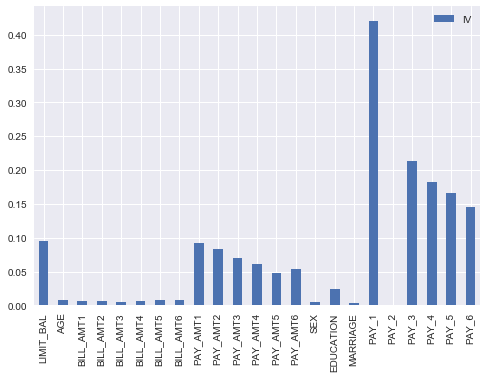

In [42]:
iv.plot(kind='bar')
plt.show()

In [ ]:
# pay_1 has highest information value, all the pay status has relatively high IV